## A/B тест для интернет-магазина

### Шаг 1. Ознакомление с данными

In [1]:
#импортируем необходимые библиотеки для работы с данными
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import scipy.stats as stats

In [2]:
#прочитаем первый датасет
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
#прочитаем второй датасет
orders = pd.read_csv('/datasets/orders.csv')

In [4]:
#прочитаем третий датасет
visitors = pd.read_csv('/datasets/visitors.csv')

In [5]:
#снимем ограничение на количество отображемых символов в столбцах датасетов
pd.set_option('max_colwidth', 200)

In [6]:
#взглянем кратко на первый датасет
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
#взглянем кратко на второй датасет
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
#взглянем кратко на третий датасет
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
#выведем первые пять строк датасета hypothesis
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [10]:
#выведем первые пять строк датасета orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
#выведем первые пять строк датасета visitors
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
#проверим столбцы датасета hypothesis на наличие и количество уникальных значений
print(len(hypothesis['Hypothesis'].unique()))
print(len(hypothesis['Reach'].unique()))
print(len(hypothesis['Impact'].unique()))
print(len(hypothesis['Confidence'].unique()))
print(len(hypothesis['Efforts'].unique()))

9
6
7
7
6


In [13]:
#проверим столбцы датасета orders на наличие и количество уникальных значений
print(len(orders['transactionId'].unique()))
print(len(orders['visitorId'].unique()))
print(len(orders['date'].unique()))
print(len(orders['revenue'].unique()))
print(len(orders['group'].unique()))

1197
1031
31
713
2


In [14]:
#проверим столбцы датасета visitors на наличие и количество уникальных значений
print(len(visitors['date'].unique()))
print(len(visitors['group'].unique()))
print(len(visitors['visitors'].unique()))

31
2
58


In [15]:
#проверим количество пропущенных значений во всех датасетах
hypothesis.isna().sum()
orders.isna().sum()
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [16]:
#проверим датасет hypothesis на наличие и количество дубликатов
hypothesis.duplicated().sum()

0

In [17]:
#проверим датасет orders на наличие и количество дубликатов
orders.duplicated().sum()

0

In [18]:
#проверим датасет visitors на наличие и количество дубликатов
visitors.duplicated().sum()

0

### Вывод

##### До начала работы было сделано:
1. Импортирована библиотека pandas для работы с датасетами;
2. Импортирована библиотека matploplib для базовой работы с графиками;
3. Импортирована библиотека seaborn для расширенной работы с графиками;
4. Импортирована библиотека numpy для работы c многомерными массивами;
5. Импортирована библиотека datetime для работы с датами;
6. Импортиована библиотека scipy.stats для работы со статистикой.


##### Предварительная работа с данными:
1. Все датасеты были прочитаны и заключены в переменные hypothesis, orders и visitors соответственно;
2. Получено первичное представление о данных и выведены первые пять строк датасетов;
3. Для датасетов определено и подсчитано количество уникальных значений;
4. Датасеты проверены на наличие пропущенных значений;
5. Датасета проверены на наличие дубликатов.

#### Hypothesis
Количество элементов - 9, количество уникальных значений - 35, количество столбцов - 5, тип данных - object, int.

##### Наименования столбцов, значения и обнаруженные ошибки:
Hypothesis — краткое описание гипотезы - ошибок нет;
Reach — охват пользователей по 10-балльной шкале - ошибок нет;
Impact — влияние на пользователей по 10-балльной шкале - ошибок нет;
Confidence — уверенность в гипотезе по 10-балльной шкале - ошибок нет;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале - ошибок нет.
##### Дубликатов и пропусков не обнаружено; наименования столбцов следует привести к единому нижнему регистру.

#### Orders
Количество элементов - 1197, количество уникальных значений - 2974, количество столбцов - 5, тип данных - int, object.

##### Наименования столбцов и обнаруженные ошибки:
transactionId — идентификатор заказа - ошибок нет;
visitorId — идентификатор пользователя, совершившего заказ - ошибок нет;
date — дата, когда был совершён заказ - ошибок нет;
revenue — выручка заказа - ошибок нет;
group — группа A/B-теста, в которую попал заказ - ошибок нет.
##### Дубликатов и пропусков не обнаружено; столбец 'date' нужно привести к формату даты.

#### Visitors
Количество элементов - 62, количество уникальных значений - 91, количество столбцов - 3, тип данных - int, object.

##### Наименования столбцов и обнаруженные ошибки:
date — дата - ошибок нет;
group — группа A/B-теста - ошибок нет;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста - ошибок нет.
##### Дубликатов и пропусков не обнаружено; столбец 'date' нужно привести к формату даты.

##### Задачи на последующую работу:
1. Тип данных столбцов 'date' в датасетах orders и visitors необходимо привести к формату даты;
2. Наименования столбцов в датасете hypothesis привести к нижнему регистру.
### Часть 1
1. Приоритизировать гипотезы методом ICE и отсортировать по убыванию приоритета;
2. Приоритизировать гипотезы методом RICE и отсортировать по убыванию приоритета;
3. Объяснить, в чем разница между полученными результатами приоритизации различными методами;
### Часть 2
1. Построить график кумулятивной выручки по группам, сделать выводы и предположения;
2. Построить график кумулятивного среднего чека по группам, сделать выводы и предположения;
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A, сделать выводы и предположения;
4. Построить график кумулятивной конверсии по группам, сделать выводы и предположения;
5. Построить график относительного изменения кумулятивной конверсии группы B к группе А, сделать выводы и предположения
6. Построить точечный график количества заказов по пользователям, сделать выводы и предположения;
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя, выбрать границу для определения аномальных пользователей;
8. Построить точечный график стоимостей заказов, сделать выводы и предположения;
9. Посчитать 95-й и 99-й перцентили стоимости заказов, выбрать границу для определения аномальных заказов;
10. Посчитать статистическую значить различний в конверсии между группами по "сырым" данным, сделать выводы и предположения;
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным, сделать выводы и предположения;
12. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным, сделать выводы и предположения;
13. Принять решение по результатам теста и объяснить его. Варианты - 1. Остановить тест и зафиксировать победу одной из группы; 2. Остановить тест, зафиксировать отсутствие различий между группами; 3 - Продолжить тест.
14. Написать общий вывод.

### Предобработка данных

In [19]:
#приведем тип данных столбцов 'date' датасетов orders и visitors к формату даты
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [20]:
#приведем наименования столбцов в датасете hypothesis к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

### Вывод

##### На этапе преообработки было сделано:
1. Тип данных столбцов 'date' датасетов orders и visitors приведен к формату даты;
2. Наименования столбцов датасета hypothesis приведены к нижнему регистру.

##### По итогу выполнены все необходимые преобразования.

### Часть 1. Приоритизация гипотез

In [21]:
#приоритизируем гипотезы методом ICE
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [22]:
#приоритизируем гипотезы методом RICE
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод

##### Наиболее подходящая гипотеза по фреймворку ICE - 8 (Запустить акцию, дающую скидку на товар в день рождения); неподходящая - 4 (Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей)

##### Наиболее подходящая гипотеза по фреймворку RICE - 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок); неподходящая - 4

Изменения в приоритизации гипотез фреймворками ICE и RICE произошли из-за того, что в первом случаем при приоритазции мы не учитывали то, сколько пользователей затронет изменение, которые мы хотим произвести.
В случае же с RICE учитывается как раз количество пользователей, на которых повлиляет привнесенное изменение, из-за чего наиболее приоритетной для нас является гипотеза под номером 7.

В обоих случаях самой неподходящей остается гипотеза под номером 4.

Разница между фреймворками заключается в том, что ICE в отличие от RICE не предоставляет нам информации о том, скольких пользователей затронут привнесенные изменения, поэтому предпочтительнее будет презентовать фреймворк RICE.

### Часть 2. Анализ A/B-теста

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


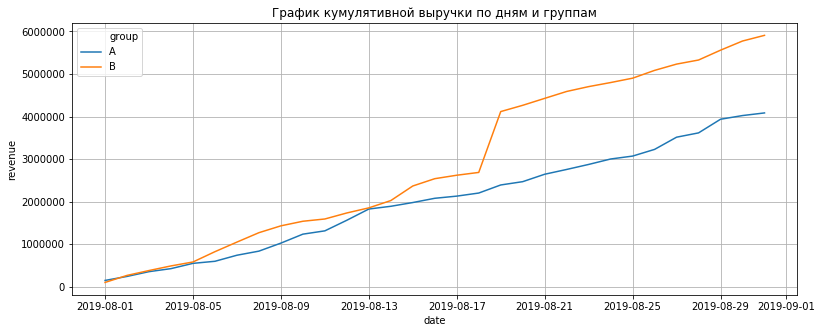

In [23]:
#график кумулятивной выручки по группам

#датафрейм с уникальными парами значений date и group
datesGroups = orders[['date', 'group']].drop_duplicates()

#аггрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x:
orders[np.logical_and(orders['date'] <= x['date'],
orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

#аггрегированные кумулятивные по дням данные о пользователях
visitorsAggregated = datesGroups.apply(lambda x:
visitors[np.logical_and(visitors['date'] <= x['date'],
visitors['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединим полученные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'],
right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'transactions']]

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'transactions']]

plt.figure(figsize=(13,5))
ax = sns.lineplot(data=cumulativeData, x='date', y='revenue', hue='group')
plt.grid()
ax.set_title('График кумулятивной выручки по дням и группам');

##### Выводы по графику:
1. Изначально графики росли практически равномерно, однако на отметке 2019.08.18 группа B сделала резкий скачок и сильно оторвалась от группы A;
2. В целом группа B выглядит предпочтительнее группы A.

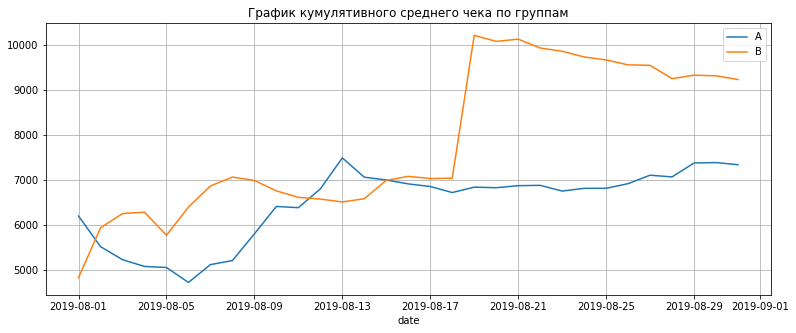

In [24]:
#график кумулятивного среднего чека по группам
plt.figure(figsize=(13,5))
#A
sns.lineplot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactions'], label='A')
#B
sns.lineplot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactions'], label='B')
plt.grid()
plt.title('График кумулятивного среднего чека по группам');

##### Выводы по графику:
Здесь уже несколько интереснее и видно больше, чем на предыдущем.
1. До определенного момента показателям среднего чека обеих групп стабилизироваться не удалось, однако на отметке 2019.08.18, группа B совершает резкий прирост - скорее всего, какой-нибудь аномальный средний чек - а затем продолжает снижаться, возвращаясь к группе A;
2. В целом и здесь группа B - что неудивительно - предпочтительнее группы A.

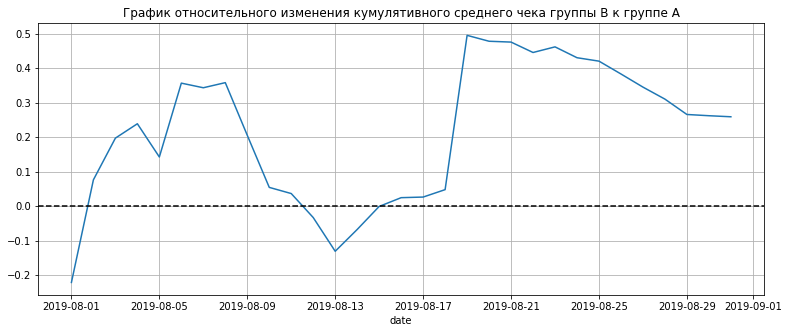

In [25]:
#график относительного изменения кумулятивного среднего чека группы B к группе A

#соберем данные о кумулятивной выручке двух групп в отдельный датасет
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on ='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим график относительного изменения кумулятивных средних чеков
plt.figure(figsize=(13,5))
ax1 = sns.lineplot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])
/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1)
plt.grid()
ax1.set_title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--');

##### Выводы по графику:
1. Лишь 2019.08.13 группа B показала себя хуже группы A, а в остальные дни стабильно лучше группы A.
Однако еще рано говорить об остановке тестирования.

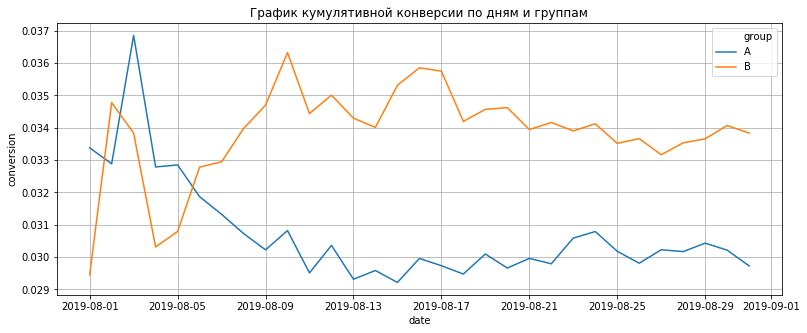

In [26]:
#график кумулятивной конверсии по группам

#столбец с данными о конверсии в датасете cumulativeData
cumulativeData['conversion'] = cumulativeData['transactions'] / cumulativeData['visitors']

#график
plt.figure(figsize=(13,5))
ax = sns.lineplot(data=cumulativeData, x='date', y='conversion', hue='group')
plt.grid()
ax.set_title('График кумулятивной конверсии по дням и группам');

##### Выводы по графику:
1. У группы A самый высокий пик по кумулятивной консервии, что может свидетельствовать об аномальном количестве посетителей, однако далее она показывает себя гораздо хуже группы B;
2. Конверсии групп достаточно неоднородны между собой, хотя ближе к концу графику наблюдается их некоторое сближение;
3. У группы B конверсия выше.

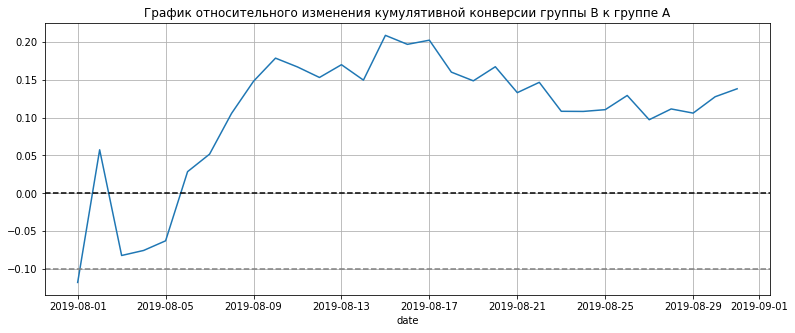

In [27]:
#график относительного изменения кумулятивной конверсии группы B к группе A

#разделим данные о конверсиях по группам 

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

#соберем данные о кумулятивной конверсии двух групп в отдельный датасет
mergedCumulativeConversion = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим график относительного изменения кумулятивной конверсии
plt.figure(figsize=(13,5))
ax2 = sns.lineplot(mergedCumulativeConversion['date'], mergedCumulativeConversion['conversionB']/mergedCumulativeConversion['conversionA']-1)
ax2.set_title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');                                                                                   

##### Выводы по графику:
1. Группа B - за исключением нескольких дней, стабильно лучше в плане конверсии, чем группа A;
2. На графике наблюдаются отдельные пики, что может свидетельствовать об аномальном количестве заказов;
В целом, конверсия у группы B недостаточно стабилзировалась, чтобы принимать решение об остановке тестирования.

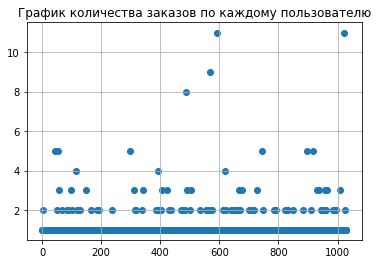

In [28]:
#точечный график количества заказов по пользователям

#датасет с информацией о количество заказов каждого пользователя
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

#график
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactionId'])
plt.grid()
plt.title('График количества заказов по каждому пользователю');

##### Выводы по графику:
1. Основная масса заказов сосредоточена в пределах единицы; есть небольшие выбросы около двойки и тройки. 
2. После четырех заказов начинаются совсем незначительные выбросы, от которых можно будет избавиться.

In [29]:
#95-й и 99-й перцентили количества заказов на пользователя
percentile_for_transaction = np.percentile(ordersByUsers['transactionId'],[95,99])
percentile_for_transaction

array([2., 4.])

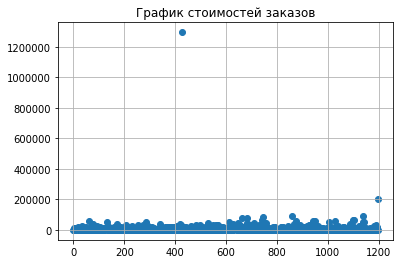

In [30]:
#точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.title('График стоимостей заказов');

##### Выводы по графику:
1. Основная масса стоимостей заказов сосредоточена в единой области и наблюдаются незначительные выбросы, о которых можно будет точнее узнать, если обратиться к перцентилям.

In [31]:
#95-й и 99-й перцентили стоимости заказов
percentile_for_transaction_price = np.percentile(orders['revenue'],[95,99])
percentile_for_transaction_price

array([28000. , 58233.2])

##### Примем за аномалии тех пользователей, которые совершили более двух заказов и на сумму от 28 тысяч рублей.

In [32]:
#статистическая значимость в различии конверсий между группами по сырым данным

#h0 - статистически значимых различий в конверсиях между группами нет
#h1 - в конверсиях между группами присутствуют статистически значимые различия

#данные о заказах группы A
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'transactions']

#данные о заказах группы B
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'transactions']

#найдем количество посетителей группы A на конкретную дату
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#найдем количество посетителей группы B на конкретную дату
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#переменная sampleA
sampleA = pd.concat([ordersByUsersA['transactions'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions'])), name='transactions')],axis=0)

#переменная SampleB
sampleB = pd.concat([ordersByUsersB['transactions'], pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['transactions'])), name ='transactions')], axis=0)

#рассчитаем статистическую значимость
print('{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

#относительное различие
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


##### Выводы по статистике:
1. p-value(0.008) < 0.05, что свидетельствует о том, что в конверсиях между группами присутствует статистическое различие;
2. Относительное преимущество группы B перед группой A равно 13,8%.

##### Гипотеза h1 подтверждена.

In [33]:
#статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

#h0 - статистически значимых различий в среднем чеке между группами нет
#h1 - в среднем чеке между группами есть статистически значимые различия

#статистическая значимость
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))

#относительное различие среднего чека между группами
print("{0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean()/
orders[orders['group'] == 'A']['revenue'].mean()-1))

0.365
0.259


##### Выводы по статистике:
1. p-value(0.365) > 0.05, что свидетельсвует о том, статистическое различие в среднем чеке между группами отсутствует;
2. Относительное преимущество группы B перед группой A равно 25,9%.

13,8% в конверсии являются статистически значимым результатом, а 25,9% в среднем чеке не являются статистически значимым результатом в силу особенностей непараметрического теста Уилкоксона-Манна-Уитни. Его главная особенность заключается в том, что взаимодействует только с номерами значений в упорядоченному ряду - рангами - не учитывая при этом сами значения. В данных у нас и в конверсии, и в среднем чеке присутствуют выбросы. 


##### Гипотеза h0 подтверждена.

In [34]:
#отсеем пользователей, совершивших более двух заказов и пользователей, совершивших покупки на сумму больше 28 тысяч рублей

#заказы
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactions'] > 4]['userId'], ordersByUsersB[ordersByUsersB['transactions'] > 4]['userId']], axis = 0)

#стоимость
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorId']

#объединим их в один датасет
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

#узнаем, сколько всего аномальных пользователей
print(abnormalUsers.shape)

(86,)


In [35]:
#статистическая значимость различий в конверсии между группами по «очищенным» данным

#h0 - статистически значимых различий в конверсии между группами по "очищенным данным" нет
#h1 - в конверсии между группами "по очищенным данным" присутствуют статистически значимые различия

#sampleAFiltered
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['transactions'], pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['transactions'])), name='transactions')],axis=0)

#sampleBFiltered
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['transactions'], pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['transactions'])), name='transactions')],axis=0)

#рассчитаем статистичекую значимость
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

#относительное различие
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.011
0.149


##### Выводы по очищенной статистике:
1. p-value(0.011) < 0.05, что свидетельствует о том, что статистическое различие в конверсии между группами присутствует.
2. Относительное преимущество группы B перед группой A равно 14,9%.

##### Гипотеза h1 подтверждена.


In [36]:
#статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

#h0 - статистически значимых различий в среднем чеке между группами "по очищенным данным" нет
#h1 - в среднем чеке между группами по "очищенным данным" присутвтуют статистически значимые различия

#рассчитаем статистическую значимость
print("{0:.3f}".format(stats.mannwhitneyu(
orders[np.logical_and(
orders['group'] == 'A',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
orders[np.logical_and(
orders['group']=='B',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

#рассчитаем относительное различие среднего чека
print("{0:.3f}".format(
orders[np.logical_and(orders['group']=='B',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
orders[np.logical_and(
orders['group']=='A',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.433
-0.002


##### Выводы по очищенной статистике:
1. p-value(0,433) > 0.05, что говорит о том, что отсутствует статистическая разница в среднем чеке между группами A и B;
2. Относительный проигрыш группы B перед группой A равен 0,2%.

##### Гипотеза h0 подтверждена.

### Выводы и решение по итогам проведенного анализа A/B теста:

##### Выводы:
1. Статистически значимое различие по конверсии между группами есть в "сырых" и в "очищенных" данных;
2. Статистически значимое различие по среднему чека между группами отсутствует в "сырых" и в "очищенных данных";
3. На основе графика различий конверсии между группами можно сделать вывод о том, что группа B лучше группы A, так как ее конверсия стабильно лучше;
4. После очищения данных средний чек группы B незначительно снизился и стал меньше, чем у группы A. Это говорит о том, что изначально ее первенство было обусловлено наличием выбросов.



##### Решение:

##### Остановить тестирование и признать победу группы B.

### Общий вывод

##### Количество уникальных значений для hypothesis - 35.

##### Количество уникальных значений для orders - 2974.

##### Количество уникальных значений для visitors - 91.

##### Наиболее подходящая гипотеза по фреймворку ICE - 8 (Запустить акцию, дающую скидку на товар в день рождения); неподходящая - 4 (Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей)

##### Наиболее подходящая гипотеза по фреймворку RICE - 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок); неподходящая - 4

##### 95-й и 99-й перцентили количества заказов - 2 и 4.

##### 95-й и 99-й перцентили стоимостей заказов - 28000 и 58233.2

##### Выводы по "сырым данным":
1. График кумулятивной выручки по дням и группам, а также график кумулятивного среднего чека сообщают о том, что группа B лучше группы A;
2. График относительного изменения кумулятивного среднего чека группы B к группе A также сообщает о том, что группа B - несмотря на небольшой провал - стабильно лучше группы A.
3. Графики кумулятивной конверсии и относительного изменения кумулятивной конверсии группы B к группе A сообщают о том, что группа B лучше группы A.
4. Согласно графикам и перцентилям количества заказов на каждого пользователя - в основном пользователи совершают один или два заказа, а дальше начинаются выбросы, существенно искажающие общее представление о данных;
5. График и перцентили стоимостей заказов говорят о том, что в основном пользователи совершают покупки на сумму до 28 тысяч рублей, а все, что лежит за этой границей - является выбросами;
6. Статистическое различие в конверсиях между группами присутствует - p-value(0.008) < 0.05, а относительное преимущество группы B перед группой A равно 13,8%;
7. Статистическое различие в среднем чеке между группами отсутствует - p-value(0.365) > 0.05, однако средний чек группы B больше среднего чека группы A на 25,9%.

##### Выводы по "очищенным данным":
1. Статистическое различие в конверсиях между группами присутствует - p-value(0.011) < 0.05, а относительное преимущество группы B перед группой A равно 14,9%;
2. Статистическое различие в среднему чека между группами отсутствует - p-value(0.433) > 0.05 - и средний чек группы B оказался незначительно меньше среднего чека группы A.

##### По итогу проведенного анализа было принято решение остановить A/B тестирование и зафиксировать победу группы B.